In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [31]:
df = pd.read_csv('placement.csv')

In [32]:
df.sample(5)

,cgpa,placement_exam_marks,placed
421,6.29,46.0,0
938,6.27,24.0,0
685,6.05,87.0,1
117,7.11,0.0,1
737,6.52,12.0,1


<Axes: xlabel='placement_exam_marks', ylabel='Count'>

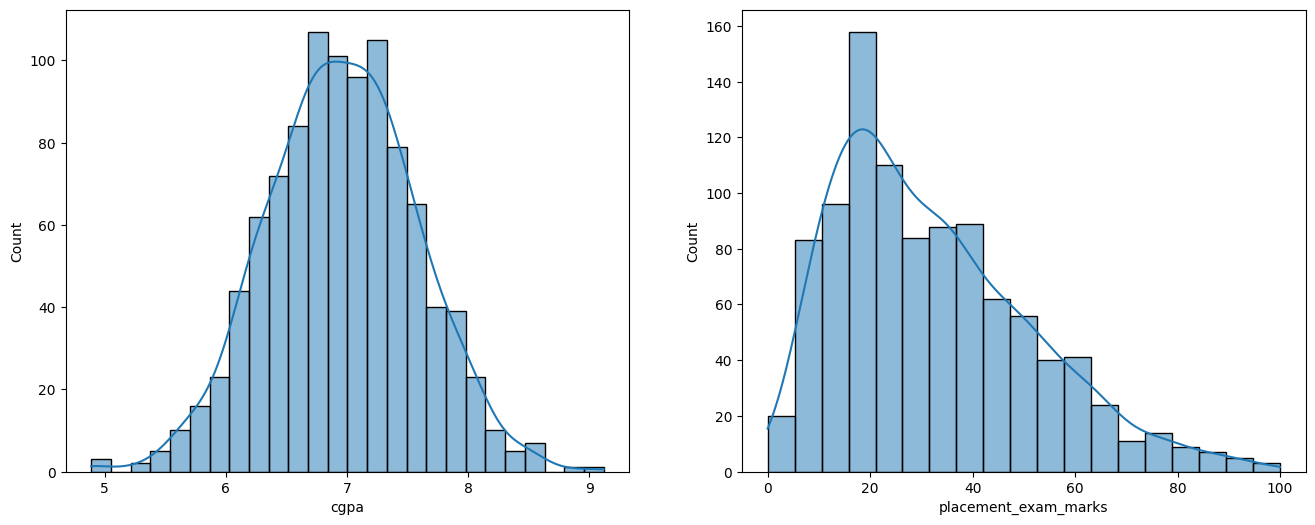

In [33]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'],kde=True)
plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde=True)

In [34]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

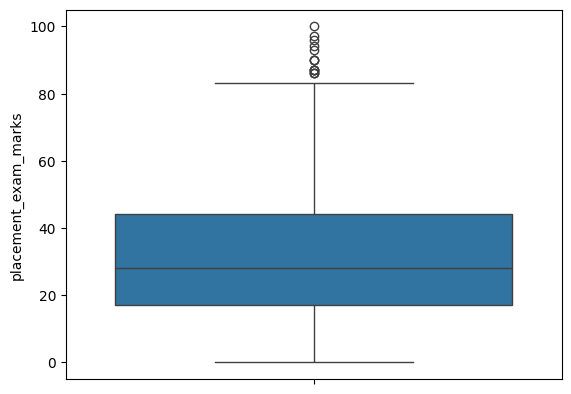

In [35]:
sns.boxplot(y=df['placement_exam_marks'])

In [36]:
percent25 = df['placement_exam_marks'].quantile(0.25)
percent75 = df['placement_exam_marks'].quantile(0.75)


In [37]:
IQR = percent75 - percent25
IQR


27.0

In [38]:
upperlimit = percent75 + 1.5*IQR
lowerlimit = percent25 - 1.5*IQR

In [39]:
upperlimit,lowerlimit

(84.5, -23.5)

# Finding Outlier

In [40]:
df[df['placement_exam_marks']> upperlimit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


# 1. Trimming

In [41]:
new_df = df[df['placement_exam_marks']<upperlimit]
new_df.shape

(985, 3)

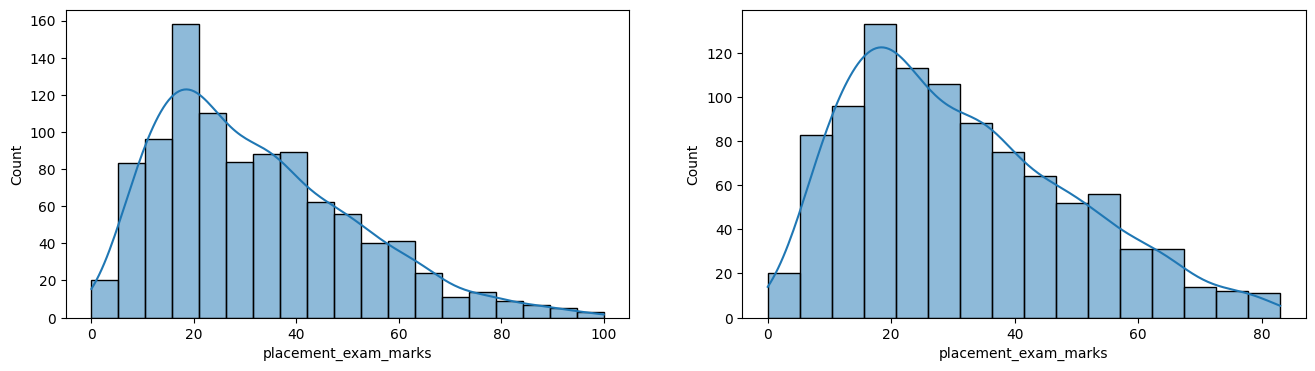

In [42]:
fig = plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.subplot(1,2,2)
sns.histplot(new_df['placement_exam_marks'],kde=True)

plt.show()

# 2. Capping

In [50]:
new_df_cap = df.copy()
new_df_cap['placement_exam_marks']= np.where(new_df_cap['placement_exam_marks']>upperlimit,
         upperlimit,
         np.where(new_df_cap['placement_exam_marks']<lowerlimit,
                  lowerlimit,
                  new_df_cap['placement_exam_marks']))




<Axes: ylabel='placement_exam_marks'>

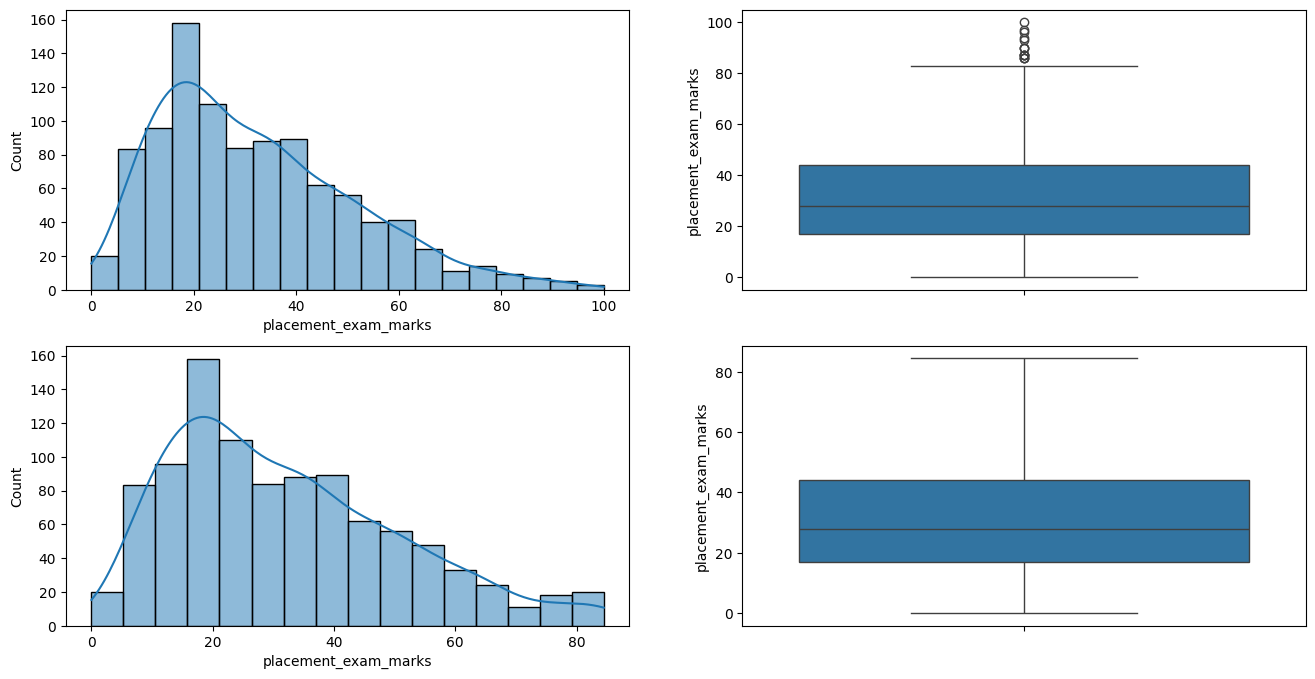

In [57]:
fig = plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde=True)
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])
plt.subplot(2,2,3)
sns.histplot(new_df_cap['placement_exam_marks'],kde=True)
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])